# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [9]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


### 1. Is the distribution of body temperatures normal? 
- Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.


Lets try to draw some plots and see how the data in Dataframe looks like.

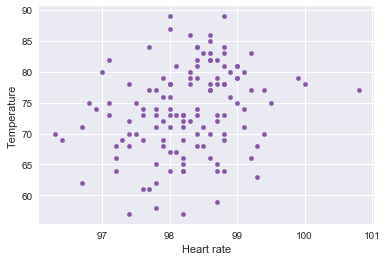

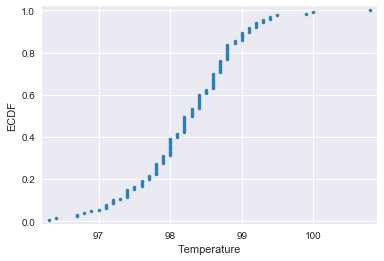

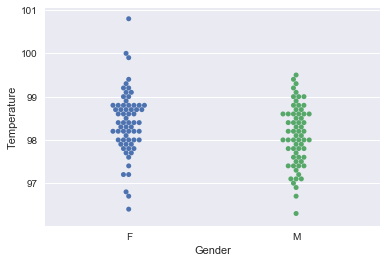

Mean of this sample is:  98.24923076923078
Median of this sample iss:  98.3
Variance of this sample is:  0.5375575432319613
25,50,75 percentile of this sample is:  [ 97.8  98.3  98.7]


In [18]:
# Your work here.
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
sns.set()

df.plot.scatter(x='temperature', y='heart_rate', color='#8856a7')
_ = plt.xlabel('Heart rate')
_ = plt.ylabel('Temperature')
plt.show()

x = np.sort(df['temperature'])
y = np.arange(1, len(x)+1) / len(x)
_ = plt.plot(x, y, marker='.', linestyle='none', color='#2c7fb8')
_ = plt.xlabel('Temperature')
_ = plt.ylabel('ECDF')
plt.margins(0.02) # Keeps data off plot edges
plt.show()

_ = sns.swarmplot(x='gender', y='temperature', data=df)
_ = plt.xlabel('Gender')
_ = plt.ylabel('Temperature')
plt.show()

temp_mean = df.temperature.mean()
temp_var = df.temperature.var()
temp_sigma = np.sqrt(temp_var)

print ("Mean of this sample is: " , temp_mean)
print ("Median of this sample iss: " , df.temperature.median())
print ("Variance of this sample is: " , temp_var)
print ("25,50,75 percentile of this sample is: " , np.percentile(df['temperature'] , [25, 50, 75]))


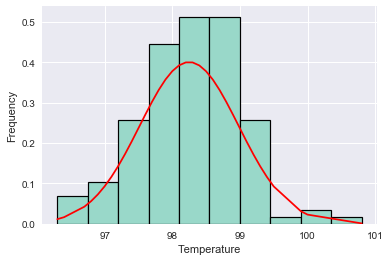

In [36]:
df_sorted = sorted(df['temperature'])
fitline = stats.norm.pdf(df_sorted, np.mean(df_sorted), np.std(df_sorted))
plt.plot(df_sorted, fitline*temp_sigma, color='r') # plot the pdf line
plt.hist(df_sorted, normed=True, color='#99d8c9', edgecolor='black', linewidth=1.2) 
_ = plt.xlabel('Temperature')
_ = plt.ylabel('Frequency')
plt.show()

- In the plotted histogram, ECDF plot, swarn plot and scatter plot, the sampling distribution looks in the form of a normal distribution but it is slightly skewed towards the high values of temprature. To confirm the normal distribution, we can also check this by using the Normal distribution function inbuilt in stats. 

Lets run the Normal statistic test on dataFrame.

In [29]:
print(stats.normaltest(df.temperature))

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)


- We can see that the p-value of temrature distribution is 0.26, we can now agree that the human body temperature in this sample is normally distributed.

### 2.  Is the sample size large? Are the observations independent?
- Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.

lets plot the individual value of the observation and see if they are dependent.

Samples size:  (130, 3)
Samples for females:  65
Samples for males:  65


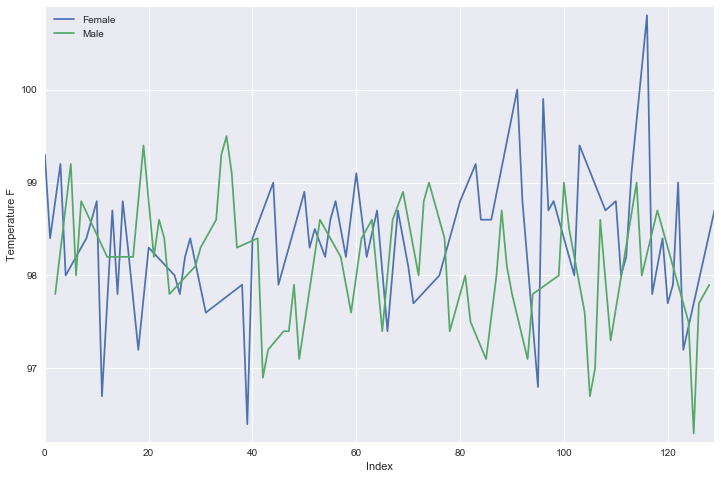

In [12]:
print("Samples size: ", df.shape)
print("Samples for females: ", sum(df.gender == "F"))
print("Samples for males: ", sum(df.gender == "M"))

plt.figure(figsize=(12,8))
df.temperature[df.gender == "F"].plot(label="Female")
df.temperature[df.gender == "M"].plot(label="Male")
plt.xlabel("Index")
plt.ylabel("Temperature F")
plt.margins(0.02) # Keeps data off plot edges
plt.legend()
plt.show()

- Sample size:
The central limit theorem (CLT) is true when the sample size is larger than 30. We have sufficiently large (greater than 30) sample here, Therefore we could consider the sample size large enough for the CLT to hold.
also, the sample has an equal number of observations for both groups (Male and Female, 60 each) which is also greater than 30, hence we could consider the sample data is good enough to be used for statistical tests.


- Observation independence:
The observation in the sample is random and follows a normal distribution. also, one person's temperature does not affect another person's temperature. In other words, there is no correlation between data points as shown in the line plot above. The observations for temperature are independent also because the sample size is significantly smaller than the total population and we do not have sufficient detail if the observations are drawn from humans of the same family or same office or same class or same city.


### 3. Is the true population mean really 98.6 degrees F?
- Would you use a one-sample or two-sample test? Why?
- In this situation, is it appropriate to use the  tt  or  zz  statistic?
- Now try using the other test. How is the result be different? Why?

Lets first calculate the standard daviation mean temprature.

In [13]:
temp_std = df.temperature.std() # Sample std deviation, which can be considered to be a good estimate for population std deviation
pmean = 98.6 # Population mean 
print("Standard Deviation of this sample is: " , temp_std)
print("Mean temperature of the entire populationis: " , (pmean))
print("Mean temperature of the sample is: {:.2f}".format(temp_mean))
s = df.temperature.std()
n = len(df.temperature)
SE = s / np.sqrt(n)
print ("Std Error Value is:", SE)


Standard Deviation of this sample is:  0.7331831580389454
Mean temperature of the entire populationis:  98.6
Mean temperature of the sample is: 98.25
Std Error Value is: 0.0643044168379


- We would use one sample test only, since we are going to calculate and compare the mean of the 'entire' population.
- Both z and t statstic test required data to be normally distributed and sampel size to be more than 30. 
- z test are mainly to compare sample to the population where it was drawn from while t test are to compare 2 independent sample. so we will use zz statistic test

    The null hypothesis here is that the population mean equals 98.6 degrees F. That is,

    $Hp_0: \mu = 98.6$

    $Hp_1: \mu \neq 98.6$

    Let's try to test this hypothesis using t test now.

In [14]:
one_sample = stats.ttest_1samp(df['temperature'], popmean=pmean)
print('The t-statistic is %.3f and the p-value is %.10f.' % one_sample)

The t-statistic is -5.455 and the p-value is 0.0000002411.


We could see that the p-value is very small. 
Therefore, we should reject the null hypothesis, and declare that the population mean is not 98.6 degrees F.

### 4. Draw a small sample of size 10 from the data and repeat both tests.
- Which one is the correct one to use?
- What do you notice? What does this tell you about the difference in application of the  tt  and  zz  statistic?

Now Let's try to test the hypothesis using Z test

In [15]:
z = (temp_mean - pmean) / SE

#compute the p-value
p = 2*(1 - stats.norm.cdf(abs(z))) #multiplication by 2 because we are doing two-sided test

print("z-value:", z)
print("p-value:", p)

#also check the 95% confidence interval
lower, upper = stats.t.interval(0.95, len(df['temperature'])-1, 
                             loc=np.mean(df['temperature']), 
                             scale=stats.sem(df['temperature']))

print('The 95% confidence interval is ({:.2f}, {:.2f}).'.format(lower,upper))

lower_99, upper_99 = stats.t.interval(0.99, len(df['temperature'])-1, 
                             loc=np.mean(df['temperature']), 
                             scale=stats.sem(df['temperature']))

print('The 99% confidence interval is ({:.2f}, {:.2f}).'.format(lower_99,upper_99))


z-value: -5.45482329236
p-value: 4.90215701365e-08
The 95% confidence interval is (98.12, 98.38).
The 99% confidence interval is (98.08, 98.42).



By comparing both Z and T test we can see that both vz and t value are same but the p value is different but 
we could see that the p-value is very small in both case. 
Therefore, we should reject the null hypothesis, and declare that the population mean is not 98.6 degrees F.


### 5. At what temperature should we consider someone's temperature to be "abnormal"?

- Start by computing the margin of error and confidence interval.

we have got the 95% confidence level calculated. lets try the margin of error now.


In [48]:
print("95% confidence level", lower, upper)
print("Margin of error at 95% confidence level is ", (upper-lower))

95% confidence level 98.1220029056 98.3764586329
Margin of error at 95% confidence level is  0.254455727245


### 6. Is there a significant difference between males and females in normal temperature?

- What test did you use and why?
- Write a story with your conclusion in the context of the original problem.

Let's start with getting the mean and var from dataFrame for male and female using slicing.

In [57]:
mean_male = df[df.gender == 'M'].temperature.mean()
var_male = df[df.gender == 'M'].temperature.var()
n_male = len(df[df.gender == 'M'].temperature)
mean_female = df[df.gender == 'F'].temperature.mean()
var_female = df[df.gender == 'F'].temperature.var()
n_female = len(df[df.gender == 'F'].temperature)
SE = np.sqrt(var_male/n_male + var_female/n_female)
print('There are {} tempratures of male in sample and their mean temperature is {:.2f}'.format(n_male, mean_male))
print('There are {} tempratures of female in sample and their mean temperature is {:.2f}'.format(n_female, mean_female))
print('Standard error is: ', SE)

There are 65 tempratures of male in sample and their mean temperature is 98.10
There are 65 tempratures of female in sample and their mean temperature is 98.39
Standard error is:  0.12655395042


These two means are different, so we should compare the male sample mean to the female sample mean.
because we have to compare male and female groups, we think a two-sample t test is more suitable than a one-sample t-test. 

In [64]:
ttest_result = stats.ttest_ind(df.temperature[df.gender == "F"], df.temperature[df.gender == "M"], )
print('The t statistic is %.3f and the p value is %.3f.' % ttest_result)


The t-statistic is 2.285 and the p-value is 0.024.
The z score is:  -2.28543453817
The p-value is:  0.0222873607607


Since the p value is smaller than the significance level 0.05, we reject the null hypothesis and confirm that the mean female temperature is greater than the mean male temperature, and we are 95% confident about that.
but even though there is statistical significance ther eis no need to publish seperate mean temrature for male and female as the difference of temprature is not that significant on scale.


###### Conclusion
For many many years, the normal body temeprature of humans was supposed to be 98.6 F. but in Recent study, based on collecting temperature data from independent 130 humans, showed that the value of the mean temeprature has changed. Based on the samples in the study, the study suggestes that there is 95% confidence that the mean normal temeprature of human body is between 98.12 F and  98.38 F. The 99% confidence for the temeprature of human body between 98.08 F and 98.42 F .
The study also found with 95% confidence that the mean female temperature is greater than the mean male temperature.
